In [1]:
import coeficients
import cmeans_math.data_loads as data_loads
import cmeans_math.data_preprocessing as dp

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('./data/cancer/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data = data.drop(columns=['id', 'diagnosis'])

In [8]:
X = np.array(data)

In [9]:
X = np.array(dp.get_updated_data_set(X))
X

array([[ 0.04207487, -0.9546838 ,  0.09197706, ...,  0.82405498,
         0.1969249 , -0.16227207],
       [ 0.28628899, -0.45485289,  0.23156658, ...,  0.27835052,
        -0.53282082, -0.55424374],
       [ 0.20299115, -0.2194792 ,  0.19148642, ...,  0.67010309,
        -0.19258821, -0.57313394],
       ...,
       [-0.08949785,  0.24247548, -0.10842374, ..., -0.02542955,
        -0.74255864, -0.69618261],
       [ 0.28912869,  0.32702063,  0.33107594, ...,  0.82130584,
        -0.00571654, -0.09536928],
       [-0.92626248,  0.00304363, -0.94292032, ..., -1.        ,
        -0.48511729, -0.79863571]])

In [10]:
fsi = []
pc = []
pec = []
pcaes = []
mah = []
mah_inv = []
klc = []

In [11]:
min_cluster_count = 1
max_cluster_count = 20

In [12]:
for i in range(min_cluster_count, max_cluster_count + 1):
    cmeans_tst = coeficients.FCM_coef(mat_X=X, n_clusters=i, max_iter=300, random_state=1)
    cmeans_tst.fit()
    fsi.append(cmeans_tst.fukuyama_sugeno_index)
    pc.append(cmeans_tst.partition_coefficient)
    pec.append(cmeans_tst.partition_entropy_coefficient)
    pcaes.append(cmeans_tst.partition_coef_exp_sep)
    mah.append(cmeans_tst.mahalanobis_coefficient)
    mah_inv.append(cmeans_tst.mahalanobis_inverse_coefficient)
    klc.append(cmeans_tst.kulback_leibler_coefficient)
    print('Tested clusters:', i)

Tested clusters: 1
Tested clusters: 2
Tested clusters: 3
Tested clusters: 4
Tested clusters: 5
Tested clusters: 6
Tested clusters: 7
Tested clusters: 8
Tested clusters: 9
Tested clusters: 10
Tested clusters: 11
Tested clusters: 12
Tested clusters: 13
Tested clusters: 14
Tested clusters: 15
Tested clusters: 16
Tested clusters: 17
Tested clusters: 18
Tested clusters: 19
Tested clusters: 20


In [13]:
res_coefs = pd.DataFrame()
res_coefs['fsi'] = np.array(fsi)
res_coefs['pc'] = np.array(pc)
res_coefs['pec'] = np.array(pec)
res_coefs['pcaes'] = np.array(pcaes)
res_coefs['mah'] = np.array(mah)
res_coefs['mah_inv'] = np.array(mah_inv)
res_coefs['klc'] = np.array(klc)

In [14]:
res_coefs

,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,1417.745850,1.000000,-0.000000,0.000000,4.303234,4.303234,0.000000
1,1718.375244,0.698075,0.679056,1586.128662,4.322255,5.825295,-147.485703
2,-61.969727,0.466366,1.277721,2305.878418,4.341473,8.061912,-93.261444
3,-30.726746,0.357419,1.666528,6777.524414,4.460620,10.813522,-75.808014
4,15.702011,0.282832,2.001746,7323.204590,4.459669,13.067129,-58.630043
5,981.526611,0.238520,2.250905,11975.326172,6.098373,22.864105,-50.711014
6,844.612305,0.204296,2.476548,14756.012695,4.546263,17.976034,-43.281776
7,228.259766,0.180166,2.665795,18912.541016,5.528438,25.631067,-37.945583
8,9.031891,0.157876,2.841885,26325.218750,3.992947,20.531576,-33.543198
9,4.615860,0.143934,2.987398,26746.005859,4.849969,27.266806,-30.492701


In [15]:
res_coefs.to_csv('./data/results/cancer_res.csv')

In [16]:
def plot_res(x, y, x_label, y_label, title):
    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [18]:
res_coefs = pd.read_csv('./data/results/cancer_res.csv')

In [19]:
res_coefs.head()

,Unnamed: 0,fsi,pc,pec,pcaes,mah,mah_inv,klc
0,0,1417.745800,1.000000,-0.000000,0.000000,4.303234,4.303234,0.000000
1,1,1718.375200,0.698075,0.679056,1586.128662,4.322255,5.825295,-147.485700
2,2,-61.969727,0.466366,1.277721,2305.878418,4.341473,8.061912,-93.261444
3,3,-30.726746,0.357419,1.666528,6777.524414,4.460620,10.813522,-75.808014
4,4,15.702011,0.282832,2.001746,7323.204590,4.459669,13.067129,-58.630043


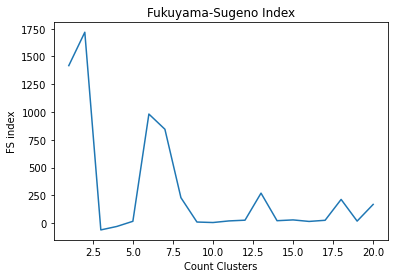

In [20]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['fsi'],
         x_label='Count Clusters', y_label='FS index', title='Fukuyama-Sugeno Index')

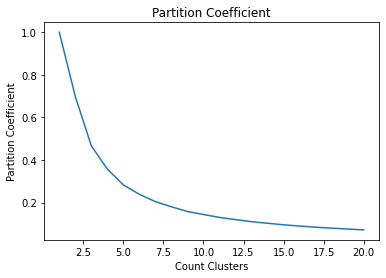

In [22]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pc'],
         x_label='Count Clusters', y_label='Partition Coefficient', title='Partition Coefficient')

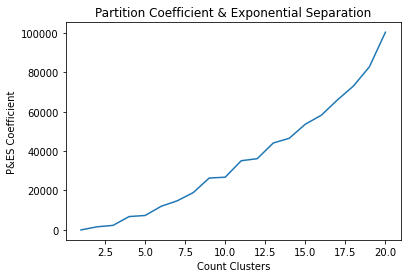

In [23]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['pcaes'],
         x_label='Count Clusters', y_label='P&ES Coefficient', title='Partition Coefficient & Exponential Separation')

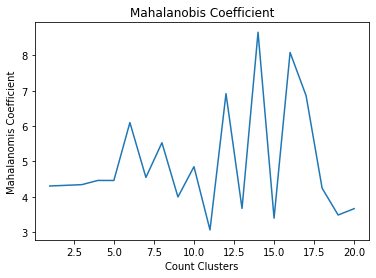

In [24]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah'],
         x_label='Count Clusters', y_label='Mahalanomis Coefficient', title='Mahalanobis Coefficient')

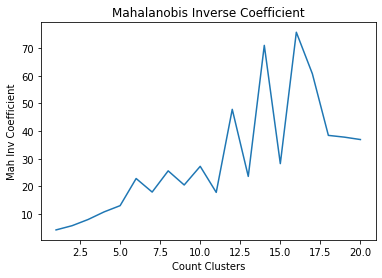

In [25]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['mah_inv'],
         x_label='Count Clusters', y_label='Mah Inv Coefficient', title='Mahalanobis Inverse Coefficient')

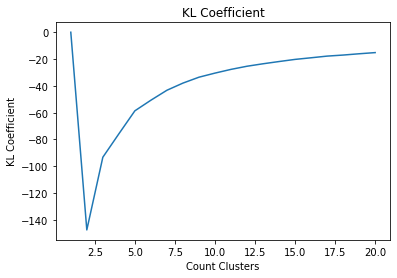

In [26]:
plot_res(x=range(min_cluster_count, max_cluster_count + 1), y=res_coefs['klc'],
         x_label='Count Clusters', y_label='KL Coefficient', title='KL Coefficient')